In [1]:
import math 
import numpy as np
import matplotlib.pyplot as plt
import random

## Step 1: Generating mandelbrot set

In [2]:
def mandelbrot(dx , nmax , xbounds=(-2.25 , 1), ybounds= (-1.5,1.5)):
    x1, x2 = xbounds
    y1, y2 = ybounds
    xs = np.arange(x1, x2 + dx, dx)
    ys = np.arange(y1, y2 + dx, dx)
    coordinates = [(x,y) for x in xs for y in ys]
    mandelbrot = []
  
    for coordinate in coordinates:
        c = complex(coordinate[0], coordinate[1])
        zn_1 = 0
        height = 0
        
        for iteration in range(nmax):
            height += 1
            zn  = (zn_1**2) + c
            if abs(zn) > 2:
                break
            zn_1 = zn
        term = (c.real, c.imag , height) 
        mandelbrot.append(term)

    return np.array(mandelbrot)

    

 #### Visualizing

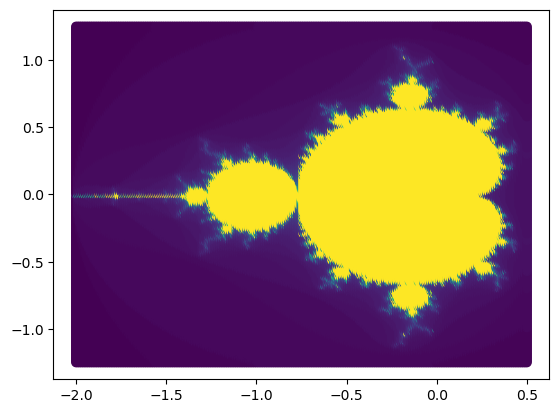

In [3]:

dx = 0.01
xrange = (-2, 0.5)
yrange = (-1.25,1.25)
nmax = 100


#sety = mandelbrot( dx=dx ,nmax = nmax)
sety = mandelbrot(dx ,nmax, xrange, yrange)

x, y , c = sety[:, 0], sety[:, 1], sety[:,2]


plt.scatter(x,y, c=c)


In [4]:
def MonteCarlo(iterations, sample, xlen, ylen):
    Data = mandelbrot(dx ,iterations, xrange, yrange)
    counter = 0
    Random_Point = random.choices(list(Data[:,2]), k = sample) # changed it to choices since we are considering uniform
        # distribution meaning every point is equally likely to be pulled. If we take random.sample it implies the likelihood
        # of the points being chosen increases after each iteration (I think at least). For not specified weights, this 
        # function chooses each number with equal probability --> uniformly distributed
    for s in range(sample):
        if Random_Point[s] >= iterations:
            counter = counter + 1
    A_m = (counter / sample) * ((xlen[1]-xlen[0]) * (ylen[1]-ylen[0]))
    return A_m

Area = MonteCarlo(1000, 10000, xrange, yrange)
print(Area)


1.478125


In [6]:
sample_size = 100000
iteration_max = 100
Res = np.empty((iteration_max, 1))

def Convergence(iteration_max, sample_size, xrange, yrange):
    Res = np.empty((iteration_max, 1))
    for i in range(iteration_max):
        Data_final = MonteCarlo(iteration_max, sample_size, xrange, yrange)
        Integral_var = MonteCarlo(i, sample_size, xrange, yrange)
        Res[i] = Integral_var - Data_final
    return Res

Result = Convergence(iteration_max, sample_size, xrange, yrange)
plt.figure(dpi=300)
plt.plot(Result, color = 'purple', linewidth = '0.8')
plt.xlabel('Iterations')
plt.ylabel(r'$A_{j,s}-A_{100,s}$')
plt.show()
plt.close()



KeyboardInterrupt: 

In [5]:
#Latin hypercube sampling
    
def intervals(arr): #Returns a list of tuples for each interval of a list

    intervals = [] # A list of tuples containing each interval for the given range      
    for i in range(len(arr)):
        j = i +1
        if(j < len(arr)):
            interval = (arr[i],arr[j])
            intervals.append(interval)

    return intervals  

      
def shuffler(x,y): #Shuffles the position of the x and y intervals in their respective lists
 
      
      shuffled_x_intervals = random.sample(x, len(x))
      shuffled_y_intervals = random.sample(y, len(y))

      return[shuffled_x_intervals,shuffled_y_intervals]


def latin_hypercube_sample(n): #Returns a list of randomly sampled n complex numbers from each row of the grid


        xrange = np.linspace(-2,0.5,n+1) #x range in grid, with step n+1
    
        yrange = np.linspace(-1.25,1.25,n+1) #y range in grid, with step n+1

        x_intervals_list = intervals(xrange) #A list in which each element is one of the intervals in the x range

        y_intervals_list = intervals(yrange) #A list in which each element is one of the intervals in the y range
        
        #print("X INTERVALS")
        #print(x_intervals_list)
        ##print("Y INTERVALS")
        #print(y_intervals_list)
        
        shuffled_x_intervals, shuffled_y_intervals  = shuffler(x_intervals_list,y_intervals_list) #Shuffling the intervals of both lists
        
        random_x_list = [] #A list of random numbers chosen uniformly from each interval of the shuffled x intervals
        random_y_list = [] #A list of random numbers chosen uniformly from each interval of the shuffled y intervals

        for interval in shuffled_x_intervals:
                
                random_x = random.uniform(interval[0],interval[1])
                random_x_list.append(random_x)


        for interval in shuffled_y_intervals:

                random_y = random.uniform(interval[0],interval[1])
                random_y_list.append(random_y)

        
        coordinates = list(zip(random_x_list, random_y_list))  
        

        random_complex_numbers = []

        for coordinate in coordinates:
                c = complex(coordinate[0], coordinate[1])
                random_complex_numbers.append(c)


        return[random_complex_numbers]



In [6]:

#GET HEIGHTS FOR LATIN HYPERCUBE SAMPLE
latin_list = latin_hypercube_sample(1000)
#print(len(mandelbrot_dictionary))
#print(mandelbrot_dictionary['(-2-1.25j)'])

heights = []

for number in latin_list[0]:
        c = number
        zn_1 = 0
        height = 0
        
        for iteration in range(nmax):
            height += 1
            zn  = (zn_1**2) + c
            if abs(zn) > 2:
                break
            zn_1 = zn
        heights.append(height)
        


In [7]:
#Calculate new Area with latin hypercube sampling
counter = 0
for height in heights:
    Random_Point = height
    if Random_Point >= 100:
            counter = counter + 1
A_m = (counter / len(heights)) * (2.5) * 2.5
print(A_m)
#Area = MonteCarlo(1000, 10000, xrange, yrange)
#print(Area)


1.4500000000000002


In [14]:
#Orthogonal sampling

def orthogonal_sampling(n):

      samples_per_quadrant = int(n/4) #Working out the nunber of samples per quadrant 

      xrange = np.linspace(-2,0.5,n+1) #x range in grid, with step n+1
      
      yrange = np.linspace(-1.25,1.25,n+1) #y range in grid, with step n+1

      x_intervals_list = intervals(xrange) #A list in which each element is one of the intervals in the x range

      y_intervals_list = intervals(yrange)#A list in which each element is one of the intervals in the y range

      midpoint = int(len(x_intervals_list)/2) #Both x and y lists have the same length, and hence the same mid point
      x_halves = [[x_intervals_list[:midpoint]],[x_intervals_list[midpoint:]]] #slicing the x intervals in half
      y_halves = [[y_intervals_list[:midpoint]],[y_intervals_list[midpoint:]]] #Slicing the y intervals in half

      quadrant1 = [x_halves[0],y_halves[0]] #Bottom left square
      quadrant2 = [x_halves[0],y_halves[1]] #Top left square
      quadrant3 = [x_halves[1],y_halves[0]] #Bottom right square
      quadrant4 = [x_halves[1],y_halves[1]] #Top right square

      quadrants = [quadrant1,quadrant2,quadrant3,quadrant4]

      def orthogonal_shuffler(x,y,n): #Shuffles the position of the x and y intervals in a quadrant
      
            
            shuffled_x_intervals = random.sample(x, n) #We only draw n intervals, where n is the number of values we want to pick from each quadrant
            shuffled_y_intervals = random.sample(y, n)

            return[shuffled_x_intervals,shuffled_y_intervals]

      orthogonal_sample = [] #Stores all the complex numbers for the Orthogonal sample
      x_interval_bin = [] #A list that stores previously used x intervals so that values in these intervals can't be selected in other quadrants
      y_interval_bin = [] #A list that stores previously used y intervals so that values in these intervals can't be selected in other quadrants



      for quadrant in quadrants:
      
            x_intervals = quadrant[0][0] #Extracting the x intervals of this quadrant
            y_intervals = quadrant[1][0] #Extracting the y intervals of this quadrant

            x_intervals = [x for x in x_intervals if x not in x_interval_bin]
            y_intervals = [y for y in y_intervals if y not in y_interval_bin]    
                        
            #print(x_intervals)
            shuffled_x_intervals, shuffled_y_intervals  = orthogonal_shuffler(x_intervals,y_intervals,samples_per_quadrant) #Shuffling the x and y intervals of this quadrant 
            random_x_list = []
            random_y_list = []

            #print(shuffled_x_intervals)
            

            for interval in shuffled_x_intervals:
                  
                        x_interval_bin.append(interval) #Add these x intervals to the bin, we don't want to use them again

                        random_x = random.uniform(interval[0],interval[1])
                        random_x_list.append(random_x)

            for interval in shuffled_y_intervals:

                        y_interval_bin.append(interval) #Add these y intervals to the bin, we don't want to use them again
                        random_y = random.uniform(interval[0],interval[1])
                        random_y_list.append(random_y)

            #print("x BIN")
            #print(x_interval_bin)
            #print("y bin")
            #print(y_interval_bin)
            coordinates = list(zip(random_x_list, random_y_list))  
                  

            for coordinate in coordinates:
                        c = complex(coordinate[0], coordinate[1])
                        orthogonal_sample.append(c)
                        
      return [orthogonal_sample]


In [17]:
##GET HEIGHTS FOR ORTHOGONAL SAMPLE

orthogonal_sample = orthogonal_sampling(1000)

print(orthogonal_sample)

orthogonal_heights = []

for number in orthogonal_sample[0]:
        c = number
        zn_1 = 0
        orthogonal_height = 0
        
        for iteration in range(nmax):
            orthogonal_height += 1
            zn  = (zn_1**2) + c
            if abs(zn) > 2:
                break
            zn_1 = zn
        orthogonal_heights.append(orthogonal_height)
        

[[(-0.810550497874465-0.7188756230761985j), (-0.9474357312895108-0.35654129509720656j), (-1.17448378983626-0.9260470679235651j), (-0.9554174760127435-0.7522994722464404j), (-1.1461656884277818-0.2803468840988364j), (-1.049003648024448-0.036318059260983644j), (-1.7614652182742976-1.0480839809410218j), (-1.1172717140943162-0.6738868947405333j), (-0.8348835212386791-0.4612470053756414j), (-0.8269193257025087-0.6552250669939497j), (-0.8417250567480838-0.0701785752473628j), (-1.3102857575037545-0.5615972563531602j), (-1.540992187223654-0.551524493403172j), (-1.8894716248072803-0.9598478971099047j), (-1.658545163263972-0.7278804811464963j), (-1.327200939632655-0.3379019114677715j), (-0.7588955599916952-0.7653571465271114j), (-1.6870145545990924-0.8917611119277852j), (-1.0094371253728167-0.11925167587745585j), (-1.5360174940824907-0.6876085556840775j), (-1.6109810232678956-0.3328131204856148j), (-1.6606368754192686-1.1506986145751716j), (-1.9456239632147991-0.721701675882122j), (-1.7531878280

In [18]:
#Calculate new Area with orthogonal sample
counter = 0
for height in orthogonal_heights:
    Random_Point = height
    if Random_Point >= 100:
            counter = counter + 1
A_m = (counter / len(orthogonal_heights)) * (2.5) * 2.5
print(A_m)
#Area = MonteCarlo(1000, 10000, xrange, yrange)
#print(Area)

1.5437499999999997
